# Métodos de cotovelo e cilueta

In [2]:
# Imports

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.DataFrame(np.random.random_sample((100,2)),columns= ['Feature_1','Feature_2'])
df.head()

,Feature_1,Feature_2
0,0.451671,0.795317
1,0.479947,0.124620
2,0.108454,0.497145
3,0.026585,0.167651
4,0.180994,0.009268


In [4]:
# Normalização via StdScaler

mms = StandardScaler()
mms.fit(df)
normalized_data = mms.transform(df)

In [5]:
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

c:\Users\marci\OneDrive\Desktop\FIAP\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\marci\OneDrive\Desktop\FIAP\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


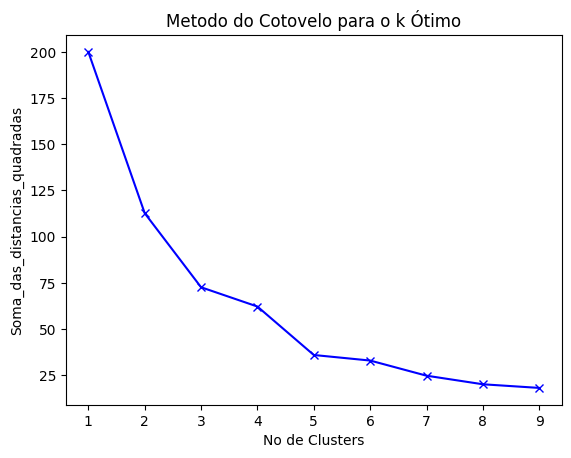

In [6]:
K = range(1,10)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(normalized_data)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('No de Clusters')
plt.ylabel('Soma_das_distancias_quadradas')
plt.title('Metodo do Cotovelo para o k Ótimo')
plt.show()

In [7]:
km = KMeans(n_clusters=3)
km = km.fit(normalized_data)

In [8]:
df['labels'] = km.labels_
df.head()

,Feature_1,Feature_2,labels
0,0.451671,0.795317,1
1,0.479947,0.124620,0
2,0.108454,0.497145,0
3,0.026585,0.167651,0
4,0.180994,0.009268,0


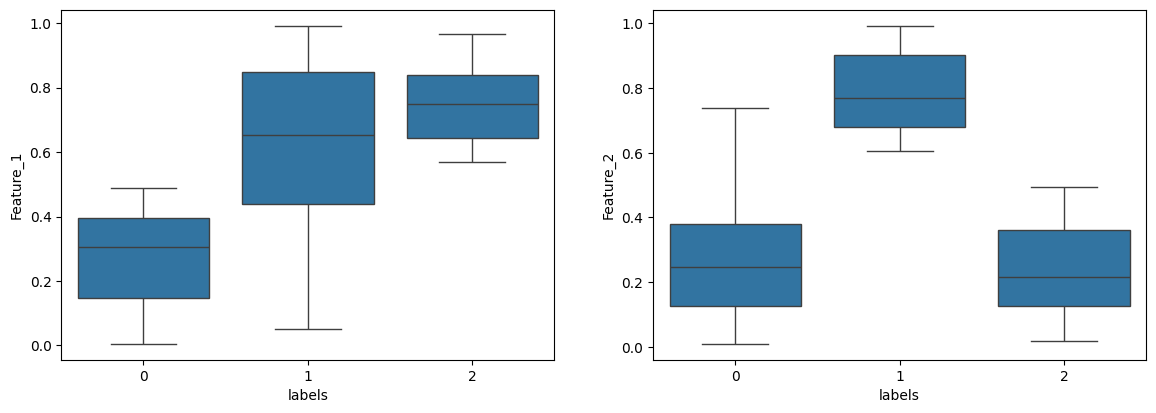

In [9]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.boxplot(x="labels", y="Feature_1", data=df)
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.boxplot(x="labels", y="Feature_2", data=df)

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

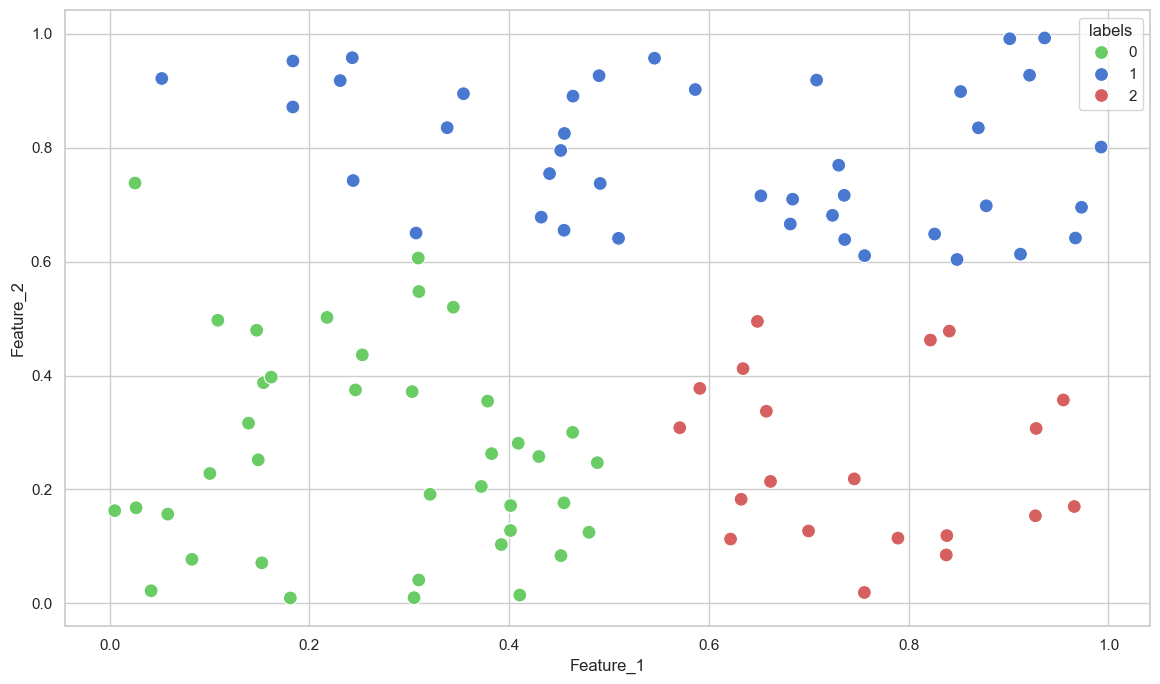

In [10]:
plt.figure(figsize=(14,8))
sns.set(style="whitegrid", palette="muted")
sns.scatterplot(x="Feature_1", y="Feature_2", hue="labels",s=100,
                     data=df,palette={0: 'g', 1 : 'b', 2 : 'r',3 : 'y'})